In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')
df = pd.concat([df1,df2])
df

,yolculuk_tarihi,tatil_gunu_mu,Pazartesi,Salı,Çarşamba,Perşembe,Cuma,Cumartesi,Pazar,saat_sin,saat_cos,yolcu_sayisi
0,2023-01-01,1,0,0,0,0,0,0,1,0.000000,1.000000e+00,4076
1,2023-01-01,1,0,0,0,0,0,0,1,0.965926,2.588190e-01,1207
2,2023-01-01,1,0,0,0,0,0,0,1,1.000000,6.123234e-17,3199
3,2023-01-01,1,0,0,0,0,0,0,1,0.965926,-2.588190e-01,3859
4,2023-01-01,1,0,0,0,0,0,0,1,0.866025,-5.000000e-01,4275
...,...,...,...,...,...,...,...,...,...,...,...,...
21605,2022-12-31,0,0,0,0,0,0,1,0,-0.965926,2.588190e-01,22993
21606,2022-12-31,0,0,0,0,0,0,1,0,-0.866025,5.000000e-01,19072
21607,2022-12-31,0,0,0,0,0,0,1,0,-0.707107,7.071068e-01,11534
21608,2022-12-31,0,0,0,0,0,0,1,0,-0.500000,8.660254e-01,8537


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28910 entries, 0 to 21609
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yolculuk_tarihi  28910 non-null  object 
 1   tatil_gunu_mu    28910 non-null  int64  
 2   Pazartesi        28910 non-null  int64  
 3   Salı             28910 non-null  int64  
 4   Çarşamba         28910 non-null  int64  
 5   Perşembe         28910 non-null  int64  
 6   Cuma             28910 non-null  int64  
 7   Cumartesi        28910 non-null  int64  
 8   Pazar            28910 non-null  int64  
 9   saat_sin         28910 non-null  float64
 10  saat_cos         28910 non-null  float64
 11  yolcu_sayisi     28910 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 3.9+ MB


###Aykırı Değerleri Yakalayalım
Veride aykırı değer gelebilecek sutün sadece yolcu sayısıdır.

<Axes: xlabel='yolcu_sayisi'>

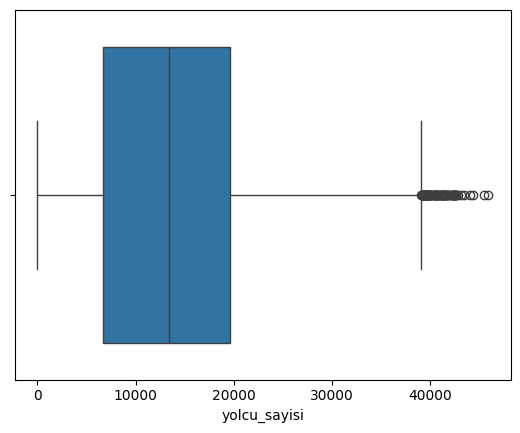

In [ ]:
sns.boxplot(x = df["yolcu_sayisi"])
#Aykırı değerler grafikte görülmektedir.

In [ ]:
#Bu aykırı değerleri bulalım
Q1 = df["yolcu_sayisi"].quantile(0.25)
Q3 = df["yolcu_sayisi"].quantile(0.75)
IQR = (Q3 - Q1) * 1.5

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")

print("------------------------------------")
alt_sinir = Q1 - IQR
ust_sinir = Q3 + IQR

print(f"Alt Sinir: {alt_sinir}")
print(f"Üst Sinir: {ust_sinir}")

print("------------------------------------")
#Alt sinir değeri negatif olamaz bundan dolayı altsinir i 0 yapmalıyız.
alt_sinir = 0
print(f"Yeni Alt Sinir: {alt_sinir}")

Q1: 6682.5
Q3: 19668.25
IQR: 19478.625
------------------------------------
Alt Sinir: -12796.125
Üst Sinir: 39146.875
------------------------------------
Yeni Alt Sinir: 0


In [ ]:
#Aykırı değerleri bulalım.
df_yolcu_sayisi = df["yolcu_sayisi"]

print("Aykırı Değerler")
aykiri_degerler = df_yolcu_sayisi[df_yolcu_sayisi > ust_sinir]
print(aykiri_degerler)

Aykırı Değerler
394      40585
1634     39395
1654     42412
1714     41998
1754     40627
         ...  
21404    39512
21424    39595
21444    39882
21564    39149
21584    39410
Name: yolcu_sayisi, Length: 96, dtype: int64


In [ ]:
# Veri setinden aykırı değerleri temizle
df_temiz = df[df["yolcu_sayisi"] <= ust_sinir]

print(f"Temiz olmayan veri: {df.shape}")
print(f"Temizlenmiş veri: {df_temiz.shape}")

# Temizlenmiş veriyi orjinal veri setine de aktardım.
df = df_temiz


Temiz olmayan veri: (28910, 12)
Temizlenmiş veri: (28814, 12)


#Eksik Gözlem Analizi Yapalım
Veride eksik bir satır veya sutun değeri varmı bunun kontrolünü yapalım.

In [ ]:
print("Değişken İsmi  Eksik Değer Sayısı")
print(df.isnull().sum())
#Veride eksik değer yoktur.

Değişken İsmi  Eksik Değer Sayısı
yolculuk_tarihi    0
tatil_gunu_mu      0
Pazartesi          0
Salı               0
Çarşamba           0
Perşembe           0
Cuma               0
Cumartesi          0
Pazar              0
saat_sin           0
saat_cos           0
yolcu_sayisi       0
dtype: int64


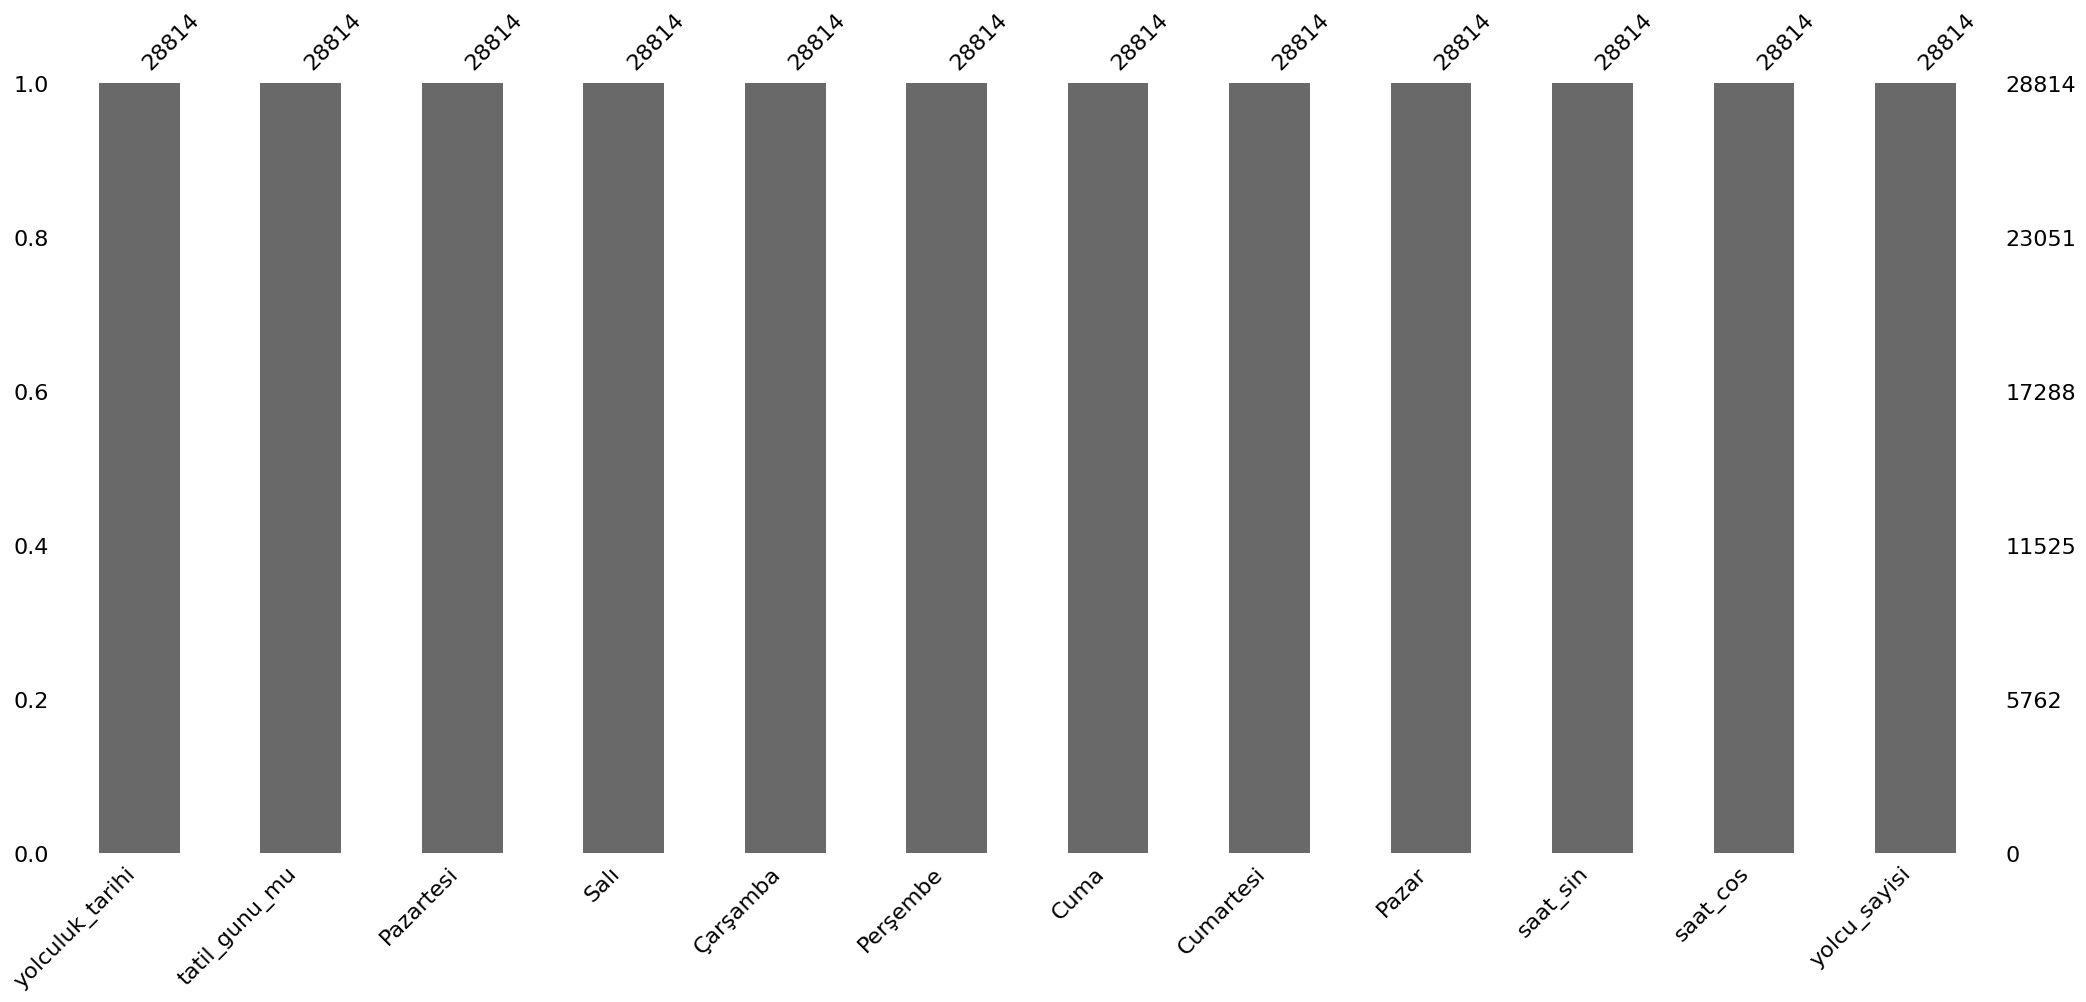

In [ ]:
import missingno as msno
msno.bar(df);

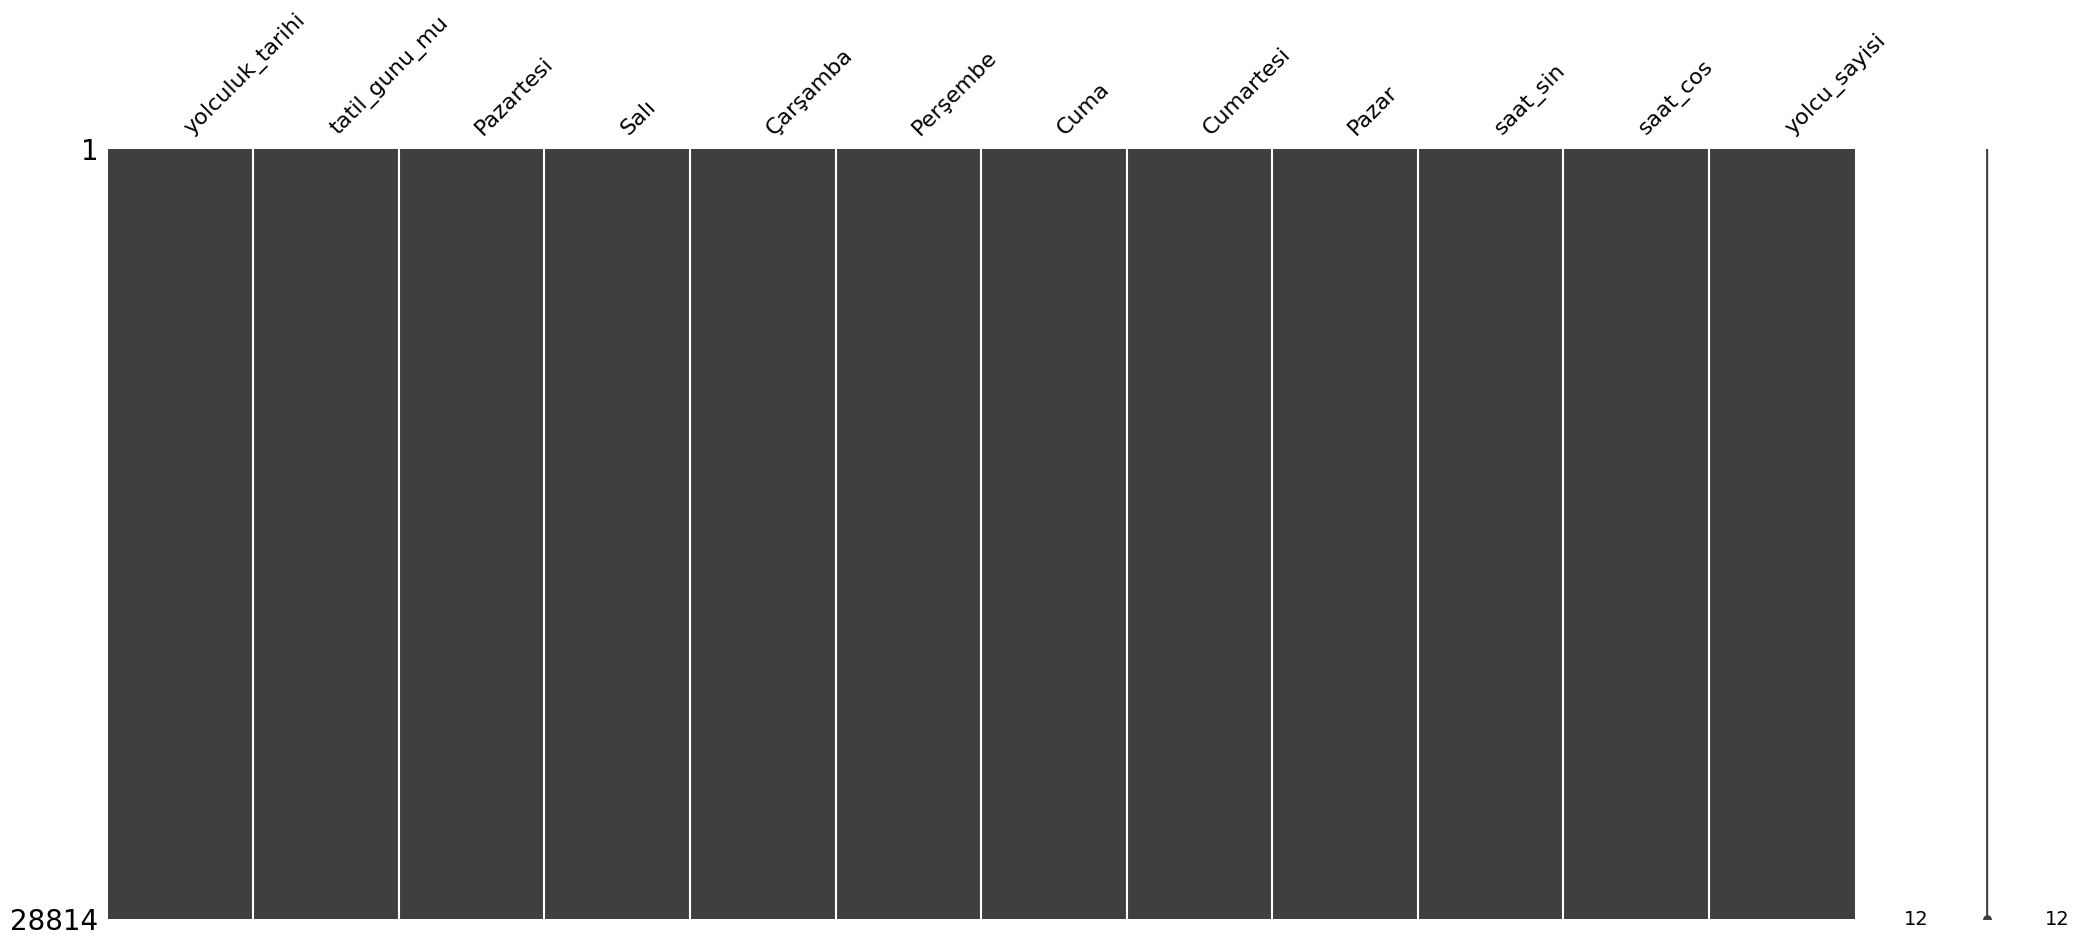

In [ ]:
msno.matrix(df);

#Veriyi Anlayalım

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Veriyi kopyalayalım.
df_copy = df.copy()


In [ ]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
tatil_gunu_mu,28814.0,0.037482,0.189942,0.0,0.000000,0.000000,0.000000,1.0
Pazartesi,28814.0,0.142778,0.349852,0.0,0.000000,0.000000,0.000000,1.0
Salı,28814.0,0.142847,0.349923,0.0,0.000000,0.000000,0.000000,1.0
Çarşamba,28814.0,0.143645,0.350736,0.0,0.000000,0.000000,0.000000,1.0
Perşembe,28814.0,0.143576,0.350665,0.0,0.000000,0.000000,0.000000,1.0
Cuma,28814.0,0.143055,0.350135,0.0,0.000000,0.000000,0.000000,1.0
Cumartesi,28814.0,0.142014,0.349071,0.0,0.000000,0.000000,0.000000,1.0
Pazar,28814.0,0.142084,0.349142,0.0,0.000000,0.000000,0.000000,1.0
saat_sin,28814.0,-0.113407,0.714449,-1.0,-0.866025,-0.258819,0.707107,1.0
saat_cos,28814.0,-0.158778,0.671956,-1.0,-0.866025,-0.258819,0.258819,1.0


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28814 entries, 0 to 21609
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yolculuk_tarihi  28814 non-null  object 
 1   tatil_gunu_mu    28814 non-null  int64  
 2   Pazartesi        28814 non-null  int64  
 3   Salı             28814 non-null  int64  
 4   Çarşamba         28814 non-null  int64  
 5   Perşembe         28814 non-null  int64  
 6   Cuma             28814 non-null  int64  
 7   Cumartesi        28814 non-null  int64  
 8   Pazar            28814 non-null  int64  
 9   saat_sin         28814 non-null  float64
 10  saat_cos         28814 non-null  float64
 11  yolcu_sayisi     28814 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 2.9+ MB


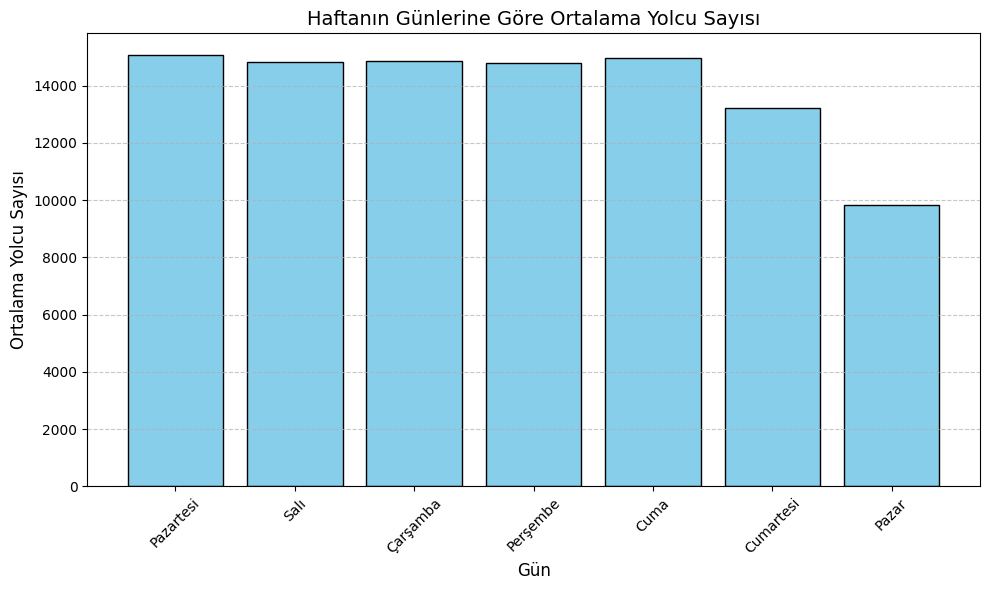

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Haftanın günleri
gunler = ['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar']

# Her gün için ortalama yolcu sayısını hesaplayalım
ortalama_yolcu = {gun: df_copy[df_copy[gun] == 1]['yolcu_sayisi'].mean() for gun in gunler}

# Sonuçları bir DataFrame'e dönüştürelim
ortalama_yolcu_df = pd.DataFrame(ortalama_yolcu.items(), columns=['Gün', 'Ortalama Yolcu Sayısı'])

# Bar grafiği çizelim
plt.figure(figsize=(10, 6))
plt.bar(ortalama_yolcu_df['Gün'], ortalama_yolcu_df['Ortalama Yolcu Sayısı'], color='skyblue', edgecolor='black')
plt.title('Haftanın Günlerine Göre Ortalama Yolcu Sayısı', fontsize=14)
plt.xlabel('Gün', fontsize=12)
plt.ylabel('Ortalama Yolcu Sayısı', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


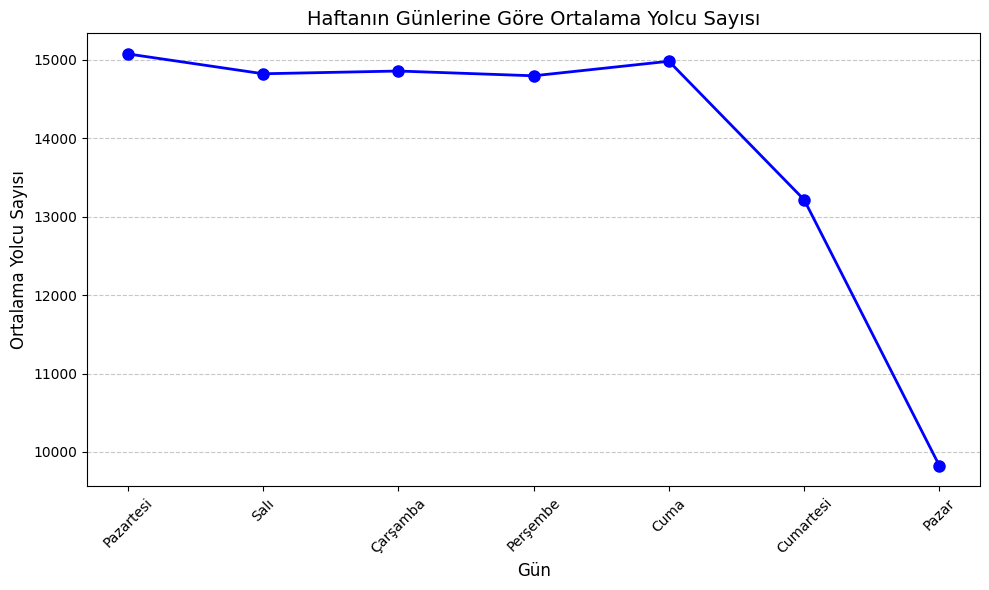

In [ ]:
# Çizgi grafiği çizelim
plt.figure(figsize=(10, 6))
plt.plot(ortalama_yolcu_df['Gün'], ortalama_yolcu_df['Ortalama Yolcu Sayısı'],
         marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)
plt.title('Haftanın Günlerine Göre Ortalama Yolcu Sayısı', fontsize=14)
plt.xlabel('Gün', fontsize=12)
plt.ylabel('Ortalama Yolcu Sayısı', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


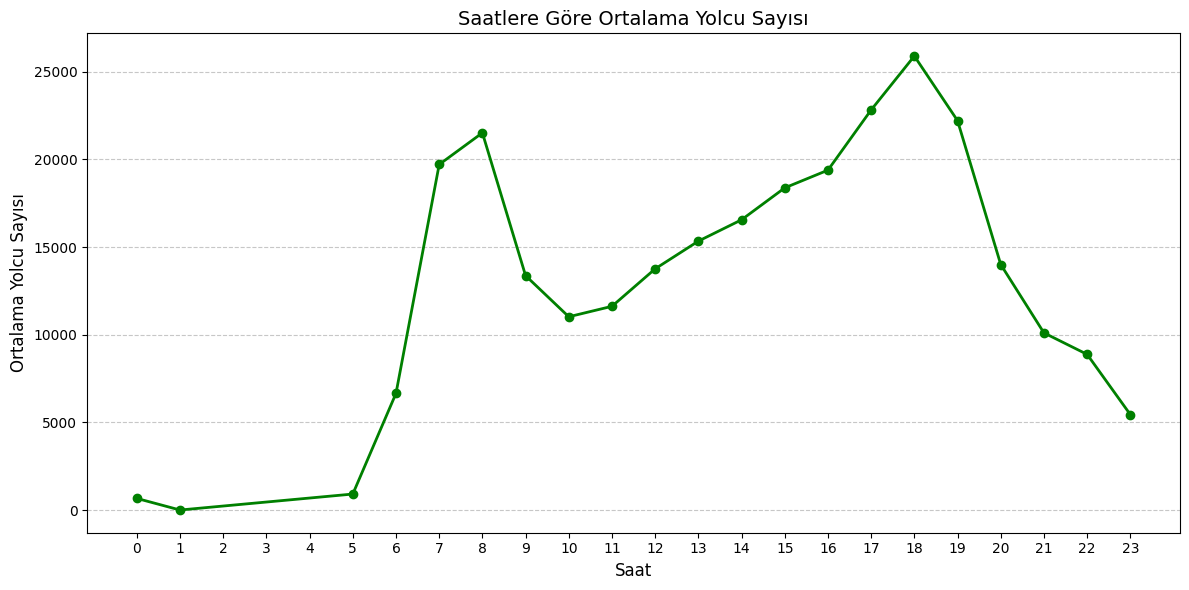

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Saatlerin hesaplanması (saat_sin ve saat_cos kullanarak)
df_copy['Saat'] = (np.arctan2(df['saat_sin'], df_copy['saat_cos']) * (24 / (2 * np.pi))).mod(24)

# Saatlere göre ortalama yolcu sayısını hesaplayalım
saatlere_gore_ortalama = df_copy.groupby('Saat')['yolcu_sayisi'].mean()

# Çizgi grafiği çizelim
plt.figure(figsize=(12, 6))
plt.plot(saatlere_gore_ortalama.index, saatlere_gore_ortalama.values, marker='o', color='green', linestyle='-', linewidth=2, markersize=6)
plt.title('Saatlere Göre Ortalama Yolcu Sayısı', fontsize=14)
plt.xlabel('Saat', fontsize=12)
plt.ylabel('Ortalama Yolcu Sayısı', fontsize=12)
plt.xticks(np.arange(0, 24, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#LSTM Modeli

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Tarih bilgilerini ayrıştırma ve veri hazırlığı
df['yıl'] = pd.to_datetime(df['yolculuk_tarihi']).dt.year
df['ay'] = pd.to_datetime(df['yolculuk_tarihi']).dt.month
df['gün'] = pd.to_datetime(df['yolculuk_tarihi']).dt.day
df['saat'] = df['saat_sin']  # 'saat_sin' ve 'saat_cos' özellikleri zaten var

# Kullanılacak özellikler
features = df[['yıl', 'ay', 'gün', 'saat_sin', 'saat_cos', 'tatil_gunu_mu',
               'Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar']]
target = df['yolcu_sayisi']

# Normalizasyon
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

scaled_features = scaler_features.fit_transform(features)
scaled_target = scaler_target.fit_transform(target.values.reshape(-1, 1))

# Zaman serisi verisi oluşturma
def create_sequences(data, target, seq_length=24):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 24
X, y = create_sequences(scaled_features, scaled_target, seq_length)

# Eğitim ve test bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LSTM modelini oluştur
model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(seq_length, X.shape[2])),
    Dropout(0.2),
    LSTM(32, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

# Modeli derle
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Modeli eğit
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Modeli değerlendirme
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Tahmin için fonksiyon
def predict_passenger_count_LSTM(year, month, day, hour_sin, hour_cos, holiday, week_days):
    """
    year: Yıl bilgisi (ör. 2024)
    month: Ay bilgisi (1-12)
    day: Gün bilgisi (1-31)
    hour_sin: Saatin sinüs dönüşümü
    hour_cos: Saatin kosinüs dönüşümü
    holiday: Tatil günü mü? (1: Evet, 0: Hayır)
    week_days: Haftanın günü bilgileri [Pazartesi, Salı, ..., Pazar] (binary liste)
    """
    input_data = np.array([[year, month, day, hour_sin, hour_cos, holiday] + week_days])
    scaled_input = scaler_features.transform(input_data)
    sequence = np.expand_dims(scaled_input, axis=1)
    prediction = model.predict(sequence)
    return scaler_target.inverse_transform(prediction)



<ipython-input-17-90bf8d64b0f5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yıl'] = pd.to_datetime(df['yolculuk_tarihi']).dt.year
<ipython-input-17-90bf8d64b0f5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ay'] = pd.to_datetime(df['yolculuk_tarihi']).dt.month
<ipython-input-17-90bf8d64b0f5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

Epoch 1/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - loss: 0.0460 - mae: 0.1650 - val_loss: 0.0191 - val_mae: 0.1020
Epoch 2/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - loss: 0.0176 - mae: 0.0992 - val_loss: 0.0127 - val_mae: 0.0824
Epoch 3/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - loss: 0.0119 - mae: 0.0804 - val_loss: 0.0104 - val_mae: 0.0763
Epoch 4/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - loss: 0.0093 - mae: 0.0706 - val_loss: 0.0084 - val_mae: 0.0665
Epoch 5/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - loss: 0.0078 - mae: 0.0645 - val_loss: 0.0086 - val_mae: 0.0658
Epoch 6/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - loss: 0.0070 - mae: 0.0601 - val_loss: 0.0090 - val_mae: 0.0681
Epoch 7/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - loss: 0.0067 - mae: 0.0593 - val_loss: 0.0073 - val_mae: 0.0614
Epoch 8/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - loss: 0.0059 - mae: 0.0558 - val_loss: 0.0064 - val_mae: 0.0573
Epoch 9/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 

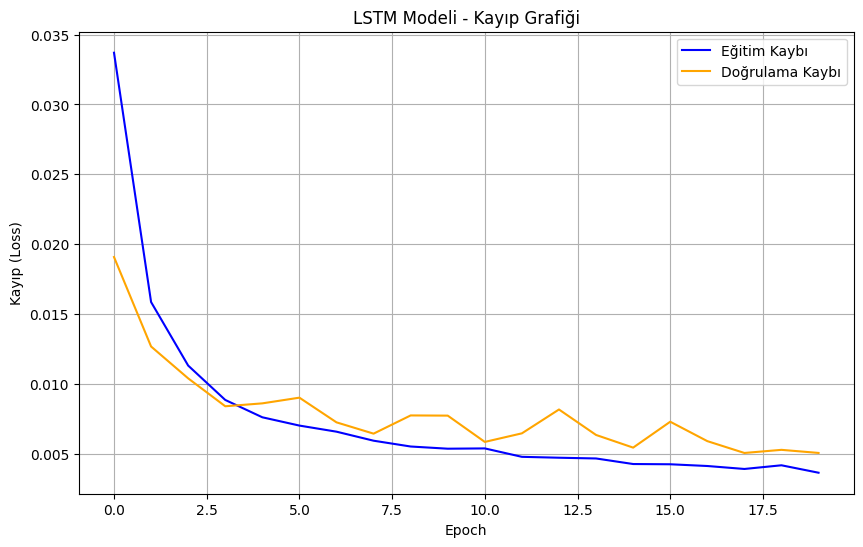

In [ ]:
import matplotlib.pyplot as plt

def plot_lstm_loss(history):
    """
    LSTM modelinin eğitim ve doğrulama kayıp grafiğini çizer.

    Parametre:
        history: Modelin eğitim sürecinde dönen `history` nesnesi.
    """
    plt.figure(figsize=(10, 6))

    # Eğitim kaybı
    plt.plot(history.history['loss'], label='Eğitim Kaybı', color='blue')

    # Doğrulama kaybı (varsa)
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Doğrulama Kaybı', color='orange')

    # Grafik detayları
    plt.title('LSTM Modeli - Kayıp Grafiği')
    plt.xlabel('Epoch')
    plt.ylabel('Kayıp (Loss)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Eğitilen modelin `history` nesnesini kullanarak grafiği çiz
plot_lstm_loss(history)


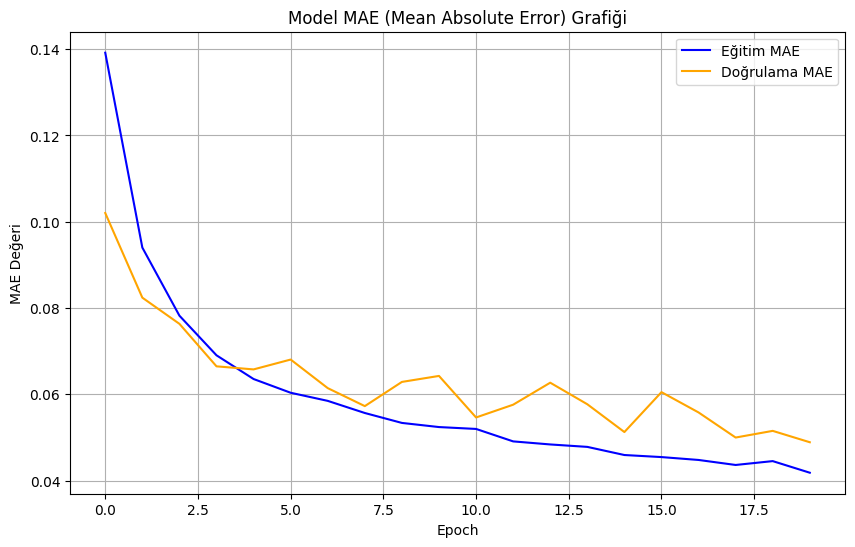

In [ ]:
import matplotlib.pyplot as plt

def plot_mae(history):
    """
    LSTM modelinin eğitim ve doğrulama MAE grafiğini çizer.

    Parametre:
        history: Modelin eğitim sürecinden dönen `history` nesnesi.
    """
    plt.figure(figsize=(10, 6))

    # Eğitim MAE
    if 'mae' in history.history:
        plt.plot(history.history['mae'], label='Eğitim MAE', color='blue')

        # Doğrulama MAE (varsa)
        if 'val_mae' in history.history:
            plt.plot(history.history['val_mae'], label='Doğrulama MAE', color='orange')

        # Grafik detayları
        plt.title('Model MAE (Mean Absolute Error) Grafiği')
        plt.xlabel('Epoch')
        plt.ylabel('MAE Değeri')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("MAE metriği bulunamadı. Modeli MAE ile derlediğinizden emin olun.")

# Modelin `history` nesnesini kullanarak grafiği çizme
plot_mae(history)


#TSMixer Modeli

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Tarih bilgilerini ayrıştırma ve veri hazırlığı
df['yıl'] = pd.to_datetime(df['yolculuk_tarihi']).dt.year
df['ay'] = pd.to_datetime(df['yolculuk_tarihi']).dt.month
df['gün'] = pd.to_datetime(df['yolculuk_tarihi']).dt.day
df['saat'] = df['saat_sin']  # 'saat_sin' ve 'saat_cos' özellikleri zaten var

# Kullanılacak özellikler
features = df[['yıl', 'ay', 'gün', 'saat_sin', 'saat_cos', 'tatil_gunu_mu',
               'Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar']]
target = df['yolcu_sayisi']

# Normalizasyon
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

scaled_features = scaler_features.fit_transform(features)
scaled_target = scaler_target.fit_transform(target.values.reshape(-1, 1))

# Zaman serisi verisi oluşturma
def create_sequences(data, target, seq_length=24):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 24
X, y = create_sequences(scaled_features, scaled_target, seq_length)

# Eğitim ve test bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TSMixer Modeli Tanımı
def tsmixer_block(input_tensor, num_patches, hidden_dim):
    """
    TSMixer blokları:
        - Patch Mixer: Zaman serisi dilimleri arasında işlem yapar.
        - Channel Mixer: Kanal bazında işlemler gerçekleştirir.
    """
    # Patch Mixer
    x = layers.LayerNormalization()(input_tensor)
    x = layers.Permute((2, 1))(x)  # Zaman boyutunu kanallar ile değiştir
    x = layers.Dense(hidden_dim, activation='gelu')(x)
    x = layers.Dense(num_patches)(x)
    x = layers.Permute((2, 1))(x)  # Orijinal sıraya geri dön
    x = layers.Add()([input_tensor, x])

    # Channel Mixer
    y = layers.LayerNormalization()(x)
    y = layers.Dense(hidden_dim, activation='gelu')(y)
    y = layers.Dense(input_tensor.shape[-1])(y)
    output_tensor = layers.Add()([x, y])

    return output_tensor

# Modeli oluşturma
def build_tsmixer_model(input_shape, num_blocks=3, hidden_dim=128):
    """
    TSMixer modelini oluşturur.
    """
    inputs = layers.Input(shape=input_shape)
    x = inputs

    num_patches = input_shape[0]  # Zaman boyutunu patch sayısı olarak kabul ediyoruz

    # TSMixer Bloklarını Ekleyelim
    for _ in range(num_blocks):
        x = tsmixer_block(x, num_patches, hidden_dim)

    # Tahmin Katmanı
    x = layers.LayerNormalization()(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(1)(x)  # Regresyon çıktısı

    model = Model(inputs, outputs, name="TSMixer")
    return model

# Modeli oluşturma
input_shape = (seq_length, X.shape[2])
model_TSMixer = build_tsmixer_model(input_shape)

# Modeli derleme
model_TSMixer.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Modeli eğitme
history = model_TSMixer.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Modeli değerlendirme
test_loss, test_mae = model_TSMixer.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Tahmin için fonksiyon
def predict_passenger_count_TSMixer(year, month, day, hour_sin, hour_cos, holiday, week_days):
    """
    year: Yıl bilgisi (ör. 2024)
    month: Ay bilgisi (1-12)
    day: Gün bilgisi (1-31)
    hour_sin: Saatin sinüs dönüşümü
    hour_cos: Saatin kosinüs dönüşümü
    holiday: Tatil günü mü? (1: Evet, 0: Hayır)
    week_days: Haftanın günü bilgileri [Pazartesi, Salı, ..., Pazar] (binary liste)
    """
    input_data = np.array([[year, month, day, hour_sin, hour_cos, holiday] + week_days])
    scaled_input = scaler_features.transform(input_data)
    sequence = np.expand_dims(scaled_input, axis=1)
    prediction = model_TSMixer.predict(sequence)
    return scaler_target.inverse_transform(prediction)



<ipython-input-20-8f1dc5264882>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yıl'] = pd.to_datetime(df['yolculuk_tarihi']).dt.year
<ipython-input-20-8f1dc5264882>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ay'] = pd.to_datetime(df['yolculuk_tarihi']).dt.month
<ipython-input-20-8f1dc5264882>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

Epoch 1/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - loss: 0.1584 - mae: 0.2327 - val_loss: 0.0165 - val_mae: 0.0971
Epoch 2/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - loss: 0.0149 - mae: 0.0924 - val_loss: 0.0132 - val_mae: 0.0851
Epoch 3/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - loss: 0.0122 - mae: 0.0831 - val_loss: 0.0147 - val_mae: 0.0915
Epoch 4/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - loss: 0.0109 - mae: 0.0787 - val_loss: 0.0107 - val_mae: 0.0771
Epoch 5/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - loss: 0.0091 - mae: 0.0712 - val_loss: 0.0087 - val_mae: 0.0672
Epoch 6/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - loss: 0.0081 - mae: 0.0663 - val_loss: 0.0083 - val_mae: 0.0650
Epoch 7/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - loss: 0.0074 - mae: 0.0644 - val_loss: 0.0068 - val_mae: 0.0600
Epoch 8/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - loss: 0.0063 - mae: 0.0583 - val_loss: 0.0083 - val_mae: 0.0702
Epoch 9/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 

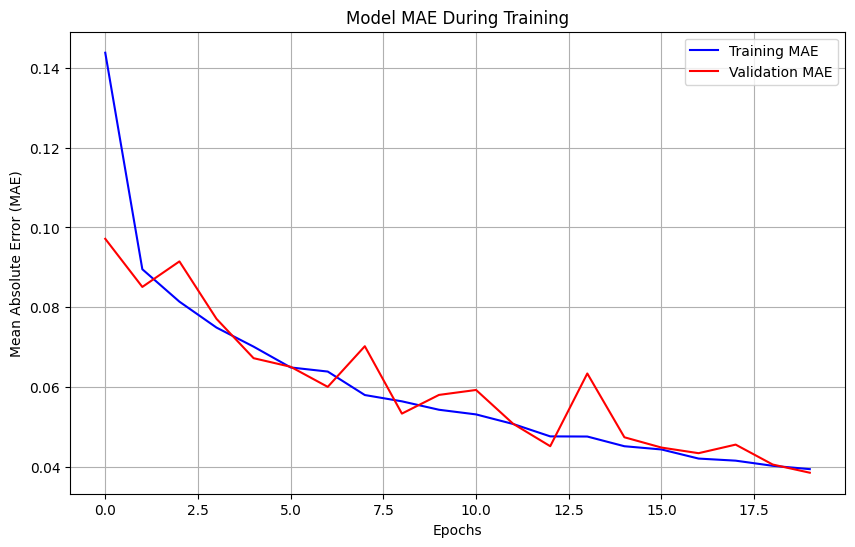

In [ ]:
import matplotlib.pyplot as plt

# Eğitim sürecindeki MAE değerlerini al
mae_values = history.history['mae']
val_mae_values = history.history['val_mae']

# MAE grafiğini çiz
plt.figure(figsize=(10, 6))
plt.plot(mae_values, label='Training MAE', color='blue')
plt.plot(val_mae_values, label='Validation MAE', color='red')
plt.title('Model MAE During Training')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.show()


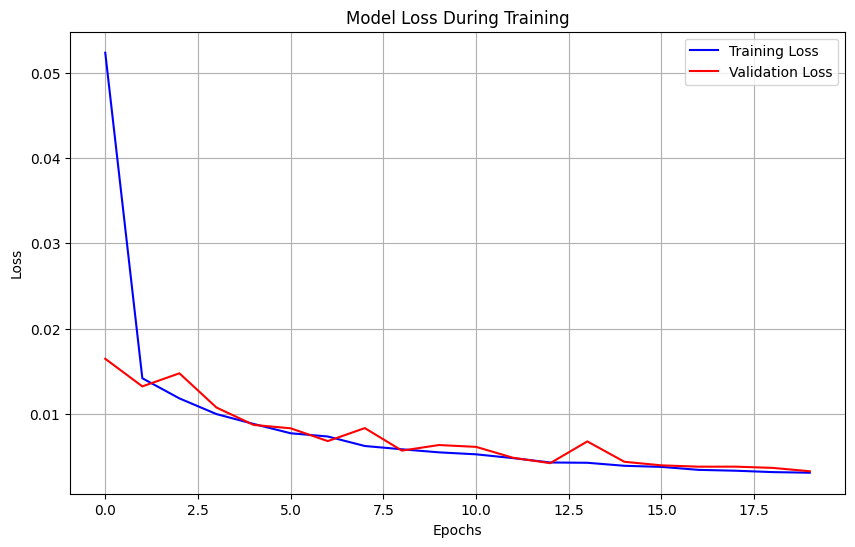

In [ ]:
import matplotlib.pyplot as plt

# Eğitim sürecindeki kayıp değerlerini al
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

# Kayıp grafiğini çiz
plt.figure(figsize=(10, 6))
plt.plot(loss_values, label='Training Loss', color='blue')
plt.plot(val_loss_values, label='Validation Loss', color='red')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


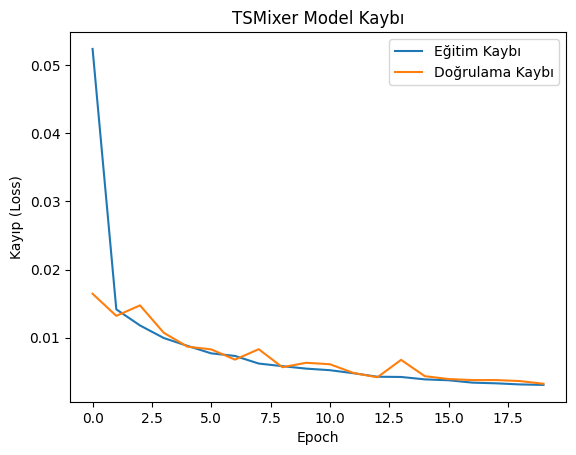

In [ ]:
import matplotlib.pyplot as plt

# Kayıp grafiği
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp (Loss)')
plt.title('TSMixer Model Kaybı')
plt.legend()
plt.show()


In [ ]:
#Saat için fonskiyon

import math

def hour_features(hour):
    """
    Saat bilgisini alır ve sinüs/kosinüs dönüşümü yapar.
    Bu dönüşümler döngüsel zaman bilgilerini modele daha iyi aktarır.

    Parametre:
        hour (int): 0 ile 23 arasında bir saat değeri.

    Dönen:
        (tuple): Saatin sinüs ve kosinüs dönüşümünden oluşan tuple.
    """
    # Saatten açıya çevirme (0-23 saat → 0-360 dereceye)
    hour_angle = (hour % 24) * 15  # 360° / 24 = 15°

    # Sinüs ve kosinüs dönüşümü
    hour_sin = math.sin(math.radians(hour_angle))
    hour_cos = math.cos(math.radians(hour_angle))

    return hour_sin, hour_cos


In [ ]:
#LSTM Modeli tahmini
#Holidaydan kasttımız resmi tatil olması
hour_sin, hour_cos = hour_features(14)
x = predict_passenger_count_LSTM(
    year=2024,
    month=9,
    day=4,
    hour_sin=hour_sin,
    hour_cos=hour_cos,
    holiday=0,
    week_days=[0, 0, 1, 0, 0, 0, 0]
)
print(f"Tahmin edilen yolcu sayısı: {x[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Tahmin edilen yolcu sayısı: 12328.84


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
#TSMixer modeli tahmini
#Holidaydan kasttımız resmi tatil olması
hour_sin, hour_cos = hour_features(14)
x = predict_passenger_count_TSMixer(
    year=2024,
    month=9,
    day=4,
    hour_sin=hour_sin,
    hour_cos=hour_cos,
    holiday=0,
    week_days=[0, 0, 1, 0, 0, 0, 0]
)
print(f"Tahmin edilen yolcu sayısı: {x[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Tahmin edilen yolcu sayısı: 12328.84


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
